# Нейронка

In [1]:
from keras.applications import VGG19
from keras.engine import Model

from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import BallTree


Using TensorFlow backend.


In [2]:
path = r'C:\Users\SUB\Desktop\Диплом\memsgenerator\memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')
df = df.drop(df[df['Base Meme Name'].isna()].index)



bm = VGG19(weights='imagenet')
model = Model(inputs=bm.input, outputs=bm.get_layer('fc1').output)

In [3]:
def RecPrec(N,hashFunc,xstart=1,xfinish=25, rad = 1, ifprint = 'Print'):# номер картинки,хешфункция,от, до, радиус, печать графика
    valueRec=[]
    valuePrec=[]
    indRadius=[]
    tmpltNme = df['Base Meme Name'][N] #название шаблона
    lenoftmplt = len(df[df['Base Meme Name']== tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    for radius in np.arange(xstart, xfinish):
        ind = tree.query_radius(hashFunc[N:N+1], r=radius/rad)  #индексы похожих эл-ов
        sumRaP=0
        sumRaP=sum(df['Base Meme Name'][ind[0]].values== tmpltNme)        
        valueRec.append(sumRaP/lenoftmplt)#recall(делим на кол-во всех картинок шаблона)
        valuePrec.append(sumRaP/len(ind[0]))#precision(делим на кол-во близких картинок)
        indRadius.append(radius)
    if(ifprint == 'Print'):
        plt.plot(indRadius,valueRec,color = 'red')#recall красный
        plt.plot(indRadius,valuePrec,color = 'blue')#precision голубой
        plt.xlabel('Радиус')
    return valueRec,valuePrec

In [4]:
%%time
#считаем хэш
global imgNeuron 
imgNeuron = []
count = 0
for i in df['Meme ID']:
    path = r'D:\memes\{}.jpg'.format(i)
    img = image.load_img(path, target_size=(224, 224)) # чтение из файла
    x = image.img_to_array(img)  # сырое изображения в вектор
    x = np.expand_dims(x, axis=0)  # превращаем в вектор-строку (2-dims)
    x = preprocess_input(x) #  библиотечная подготовка изображения
    vec = model.predict(x).ravel()
    imgNeuron.append(vec)
    count+=1
    if(count%10000==0):
        print(count)

10000
20000
30000
40000
50000
Wall time: 36min 1s


In [7]:
%%time
type(imgNeuron[0])
import csv
with open('imgNeuron.csv', 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(imgNeuron)

Wall time: 1min 14s


In [18]:
import scipy.fftpack as sc

print(sc.dct(imgNeuron[0]))

[15335.439     -459.56607    -23.520767 ...   206.1014     178.09686
  -124.731476]


In [14]:
metrics=DistanceMetric.get_metric('euclidean')
tree = BallTree(imgNeuron, metric=metrics)
sumRecprec = RecPrec(N = 0,hashFunc = imgNeuron,xstart=0,xfinish =2)

NameError: name 'plt' is not defined

In [66]:
print(sum(Xnormed[0]))
print(sum(Xnormed[8235]))
print(sum(Xnormed[42089]))
print(sum(Xnormed[48398]))
print(sum(Xnormed[53859]))
df[df['Base Meme Name']== 'Spiderman Approves']
print("\n")

for i in df[df['Base Meme Name']== 'Alright Then Business Kid'].index:
    print(sum(Xnormed[i]))

7667.719350940548
28.169155398333487
27.81722140707825
26.380084900363727
29.603595069050243


26.335544450263114
26.258738032367546
26.172936931114236
25.42377837965978
26.455097832655156
26.678158721446835
25.87614788704377
25.73865150969118
27.138144464951438
26.125659128058942
25.467803585990623
25.56726277725329
26.1766319725416
26.102524777743383
25.763663453680238
26.819533599431452
26.135356049819165
24.743965355301043
26.55233647753994
27.87843605256603
24.109699423330085
25.99161464131612
26.26488206168142
28.879001558982054


In [46]:

#If you want a normalized distance like the cosine distance, you can also normalize your vectors first and then use the euclidean metric. 
#Notice that for two normalized vectors u and v the euclidean distance is equal to sqrt(2-2*cos(u, v))
Xnorm = np.linalg.norm(imgNeuron,axis = 1)
Xnormed = np.divide(imgNeuron,Xnorm.reshape(Xnorm.shape[0],1))

metrics=DistanceMetric.get_metric('euclidean')
tree = BallTree(Xnormed, metric=metrics)

57617
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
[19205.53333333 57617.        ] [5.76170000e+04 4.91770918e+00]
Wall time: 10h 24min 46s


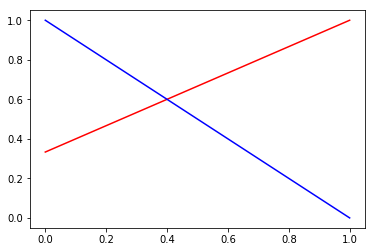

In [61]:
%%time
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


N = len(df['Base Meme Name'])  
print(N)  

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
    
sumRecprec = RecPrec(N = 0,hashFunc = Xnormed,xstart=0,xfinish =2, ifprint = 0)
for i, j in enumerate(df['Base Meme Name']):
    if (i == 0): continue
    x = RecPrec(N = k,hashFunc = Xnormed,xstart=0,xfinish =2, ifprint = 0)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if(i%5000==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(0,2),asd/N,color = 'red')#recall красный
plt.plot(range(0,2),asd2/N,color = 'blue')#precisition голубой

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(0,2),asd/N,color = 'red')#recall красный
plt.plot(range(0,2),asd2/N,color = 'blue')#precisition голубой

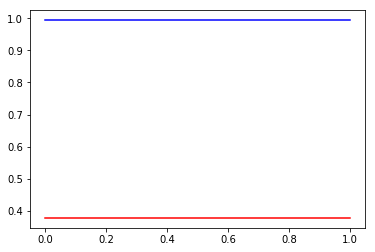

In [22]:
plt.plot(range(0,2),asd/N,color = 'red')#recall красный
plt.plot(range(0,2),asd2/N,color = 'blue')#precisition голубой